In [29]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')

voronoi_tresholded = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_tresholded_stats.h5ad')

voronoi_tresholded_buffered = sc.read_h5ad("../data/xenium/outs/final_adatas/adata_voronoi_binning_tresholded_buffered_stats.h5ad")

stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [138]:
folder = '../data/xenium/outs/'

# Read the data
adata = sc.read_10x_h5(folder + 'cell_feature_matrix.h5')

# Load the cell type annotations
cell_type_df = pd.read_csv(folder + 'insitu_replicate_1_annotation.csv', index_col=0)

# Ensure index consistency and add 'cell_type' to adata
cell_type_df.index = cell_type_df.index.astype(str)
adata.obs['cell_type'] = cell_type_df['Cluster']

# Load additional metadata and add centroid coordinates to adata
cell_meta_df = pd.read_csv(folder + 'cells.csv', index_col=0)
cell_meta_df.index = cell_meta_df.index.astype(str)
adata.obs[['x_centroid', 'y_centroid']] = cell_meta_df[['x_centroid', 'y_centroid']]
adata.obs['cell_id'] = cell_meta_df.index

# Filter out unlabeled cells
adata = adata[adata.obs['cell_type'] != 'Unlabeled']

In [139]:
adata

View of AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id'
    var: 'gene_ids', 'feature_types', 'genome'

In [140]:
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(float)
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(int)

voronoi_tresholded.obs['cell_id'] = voronoi_tresholded.obs['cell_id'].astype(float)
voronoi_tresholded.obs['cell_id'] = voronoi_tresholded.obs['cell_id'].astype(int)

voronoi_tresholded_buffered.obs['cell_id'] = voronoi_tresholded_buffered.obs['cell_id'].astype(float)
voronoi_tresholded_buffered.obs['cell_id'] = voronoi_tresholded_buffered.obs['cell_id'].astype(int)

stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(float)
stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(int)

In [141]:
voronoi_obs_df = voronoi.obs
voronoi_df = voronoi_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_df = voronoi_df.drop_duplicates(subset='cell_id')


voronoi_tresholded_obs_df = voronoi_tresholded.obs
voronoi_tresholded_df = voronoi_tresholded_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_tresholded_df = voronoi_tresholded_df.drop_duplicates(subset='cell_id')

voronoi_tresholded_buffered_obs_df = voronoi_tresholded_buffered.obs
voronoi_tresholded_buffered_df = voronoi_tresholded_buffered_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_tresholded_buffered_df = voronoi_tresholded_buffered_df.drop_duplicates(subset='cell_id')

stardist_obs_df = stardist.obs
stardist_df = stardist_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
stardist_df = stardist_df.drop_duplicates(subset='cell_id')

In [142]:
# Convert 'cell_id' in adata to string (if needed)
adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_64290/1795972567.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)


In [143]:
merged_df = adata.obs.merge(voronoi_df, on='cell_id', how='left')



In [144]:
merged_df = merged_df.rename(columns={
    'CellType': 'voronoi_cell_type',
    'realCellType': 'voronoi_cell_type_real'
})
merged_df

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN
...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1


In [145]:
merged_df2 = merged_df.merge(stardist_df, on='cell_id', how='left')

In [146]:
merged_df2 = merged_df2.rename(columns={
    'CellType': 'stardist_cell_type',
    'realCellType': 'stardist_cell_type_real'
})
merged_df2

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1
...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN


In [147]:
merged_df3 = merged_df2.merge(voronoi_tresholded_df, on='cell_id', how='left')
merged_df3 = merged_df3.rename(columns={
    'CellType': 'voronoi_tresholded_cell_type',
    'realCellType': 'voronoi_tresholded_cell_type_real'
})
merged_df3

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1


In [148]:
merged_df4 = merged_df3.merge(voronoi_tresholded_buffered_df, on='cell_id', how='left')
merged_df4 = merged_df4.rename(columns={
    'CellType': 'voronoi_tresholded_buffered_cell_type',
    'realCellType': 'voronoi_tresholded_buffered_cell_type_real'
})
merged_df4

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1


In [149]:
adata.obs = merged_df4

In [150]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1


In [151]:
adata.obs['voronoi_cell_type'] = adata.obs['voronoi_cell_type'].replace('NA', 'not_selected')

In [152]:
adata.obs['stardist_cell_type'] = adata.obs['stardist_cell_type'].replace('NA', 'not_selected')

In [153]:
adata.obs['voronoi_tresholded_cell_type'] = adata.obs['voronoi_tresholded_cell_type'].replace('NA', 'not_selected')
adata.obs['voronoi_tresholded_buffered_cell_type'] = adata.obs['voronoi_tresholded_buffered_cell_type'].replace('NA', 'not_selected')

In [154]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1


In [155]:
# Normalize and log-transform the data
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)

# Perform PCA, neighborhood graph, and UMAP

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

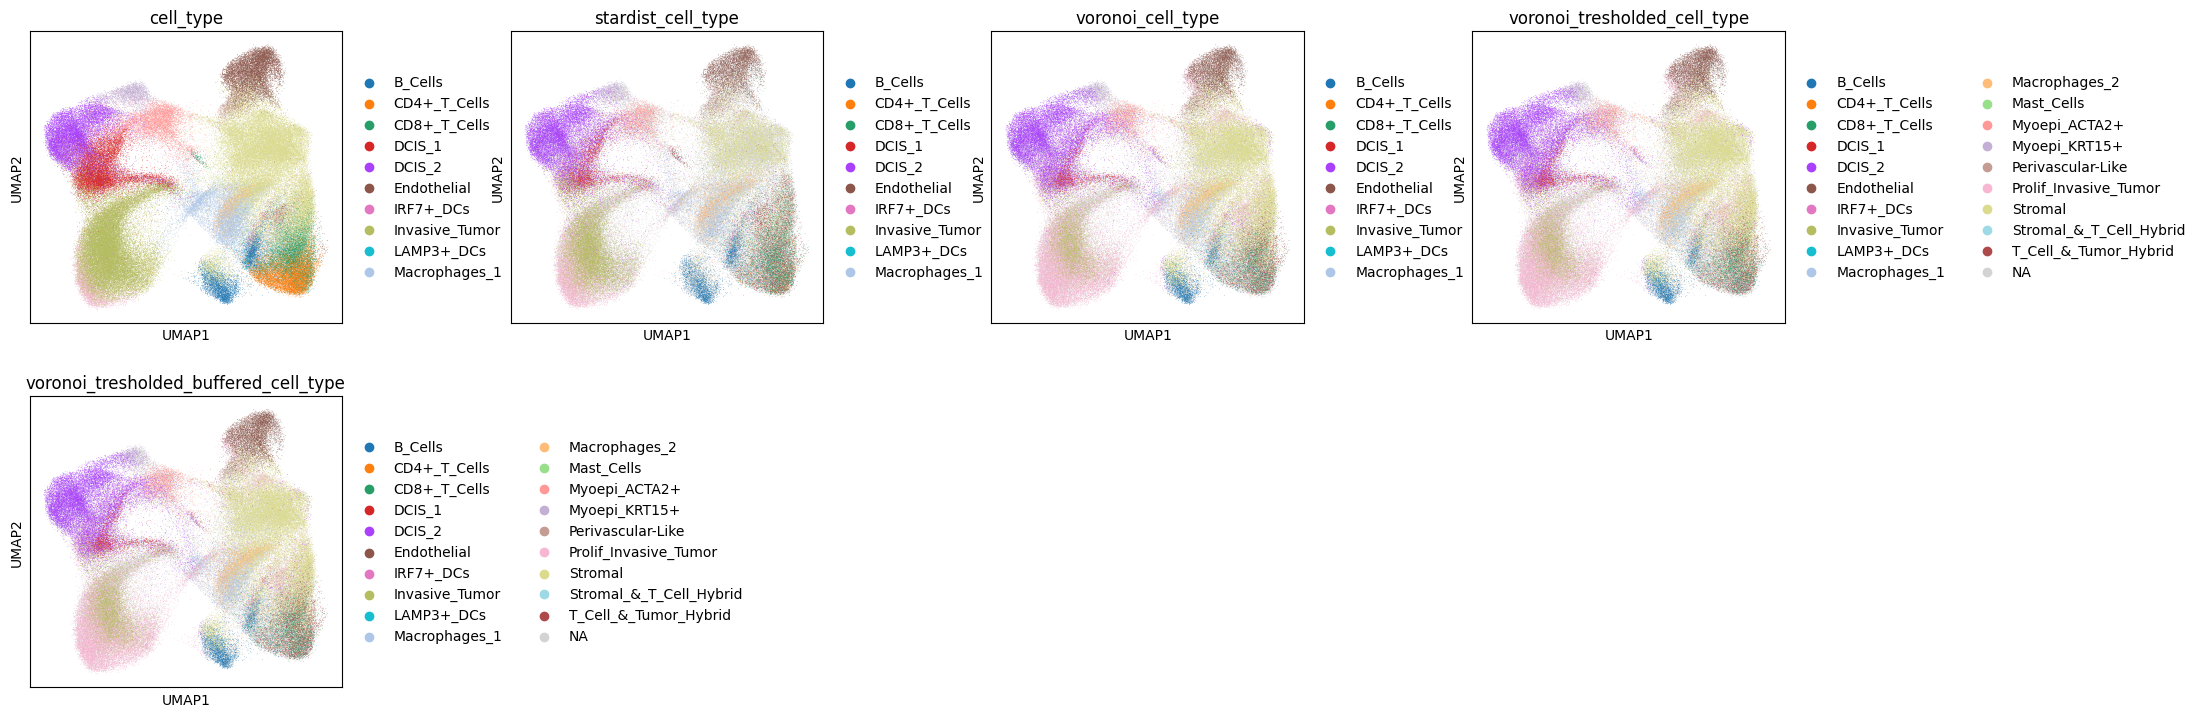

In [161]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["cell_type", 'stardist_cell_type', 'voronoi_cell_type', 'voronoi_tresholded_cell_type','voronoi_tresholded_buffered_cell_type'], wspace=0.4)

In [162]:
filtered_adata = adata[adata.obs['cell_type'] == 'Stromal']


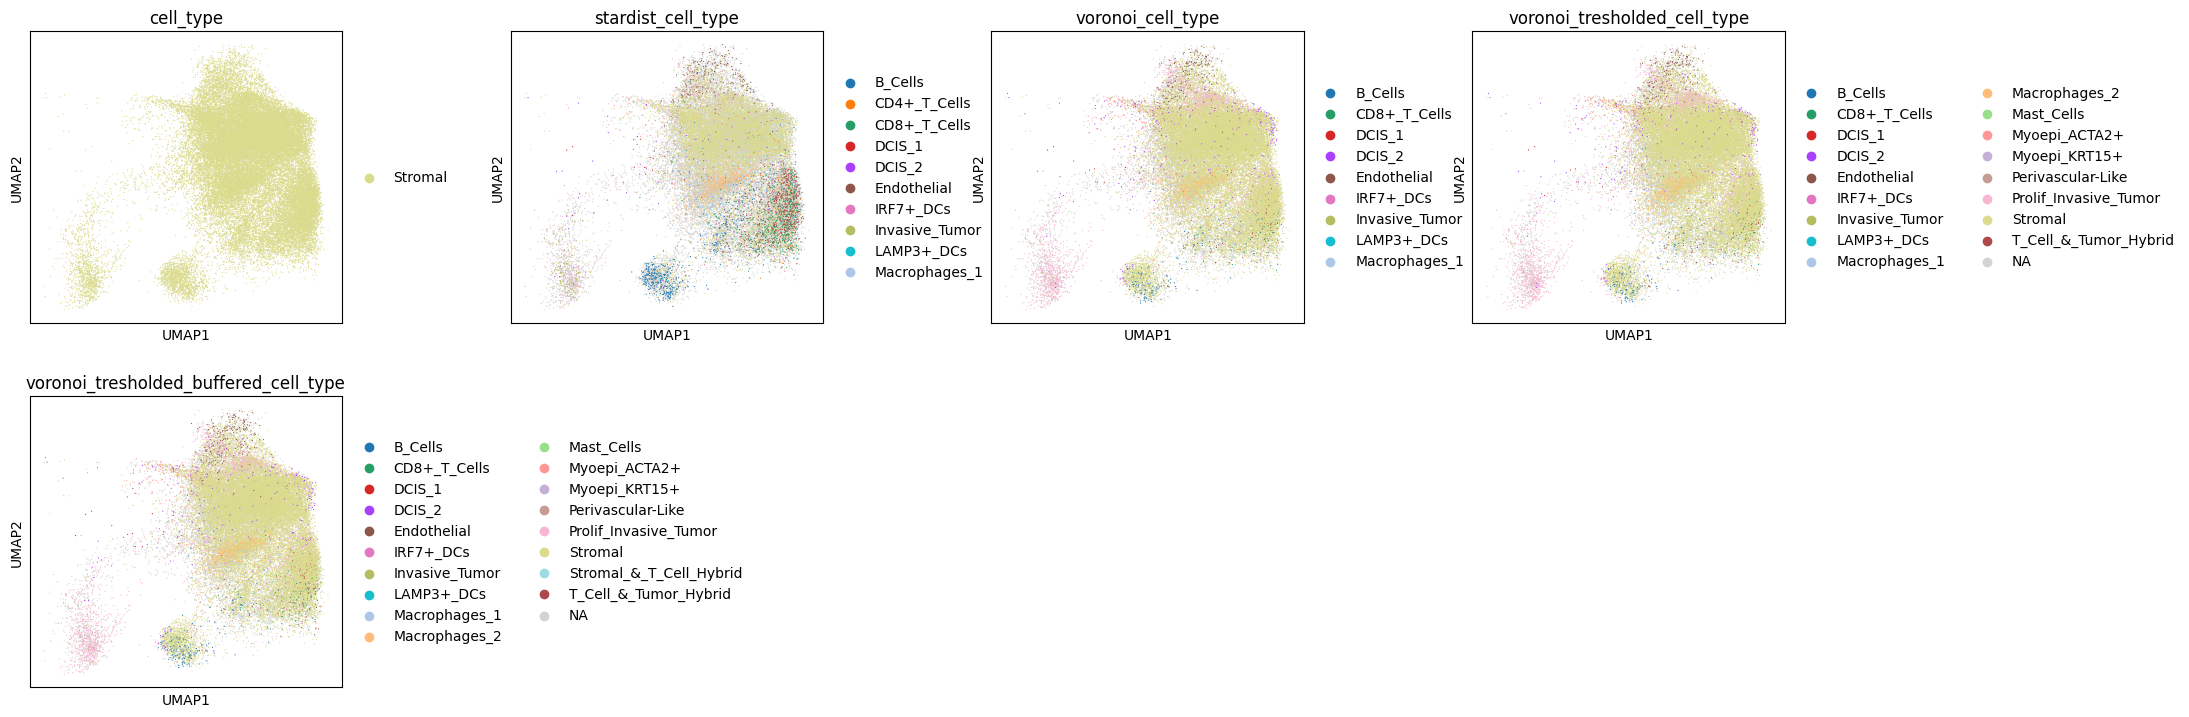

In [163]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(filtered_adata, color=["cell_type", 'stardist_cell_type', 'voronoi_cell_type', 'voronoi_tresholded_cell_type', 'voronoi_tresholded_buffered_cell_type'], wspace=0.4)

In [63]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['stardist_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5062893011503468


In [64]:
filtered_adata = adata[adata.obs['voronoi_cell_type'].notna()]

In [65]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5155383861317844


In [96]:
filtered_adata = adata[adata.obs['voronoi_tresholded_cell_type'].notna()]

In [98]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_tresholded_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5182207663338105


In [165]:
filtered_adata = adata[adata.obs['voronoi_tresholded_buffered_cell_type'].notna()]

In [166]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_tresholded_buffered_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5230798363317714
